In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
data = load_diabetes()
X, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linear = LinearRegression()
ada = AdaBoostRegressor(estimator=linear)
pipeline = Pipeline([("scaler", PolynomialFeatures()), ("reg", ada)])
gs = GridSearchCV(pipeline, param_grid={
  "reg__n_estimators" : [100],
  "reg__learning_rate" : [2, 4 , 5,],
  "scaler__degree" : [1, 3]
}, cv = 4)
gs.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', PolynomialFeatures()),
                                       ('reg',
                                        AdaBoostRegressor(estimator=LinearRegression()))]),
             param_grid={'reg__learning_rate': [2, 4, 5],
                         'reg__n_estimators': [100], 'scaler__degree': [1, 3]})

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__learning_rate,param_reg__n_estimators,param_scaler__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011464,0.004415,0.002107,0.000761,2,100,1,"{'reg__learning_rate': 2, 'reg__n_estimators':...",0.433262,0.313390,0.485137,0.585330,0.454280,0.098002,1
4,0.008320,0.000993,0.002123,0.000099,5,100,1,"{'reg__learning_rate': 5, 'reg__n_estimators':...",0.362997,0.282370,0.481590,0.576218,0.425794,0.112088,2
2,0.007463,0.000975,0.002110,0.000137,4,100,1,"{'reg__learning_rate': 4, 'reg__n_estimators':...",0.402451,0.259400,0.469348,0.537680,0.417220,0.102899,3
1,1.293850,0.036843,0.020102,0.000753,2,100,3,"{'reg__learning_rate': 2, 'reg__n_estimators':...",0.383853,0.154737,0.488370,0.551215,0.394544,0.150807,4
3,1.817279,0.989552,0.020399,0.001059,4,100,3,"{'reg__learning_rate': 4, 'reg__n_estimators':...",0.177289,0.135000,0.319703,0.395471,0.256866,0.105290,5
5,1.272219,0.015037,0.021610,0.002366,5,100,3,"{'reg__learning_rate': 5, 'reg__n_estimators':...",-0.810180,0.232371,0.353104,0.432879,0.052044,0.502897,6


In [ ]:
mean_squared_error(gs.best_estimator_.predict(x_test), y_test)

3253.3737922225678

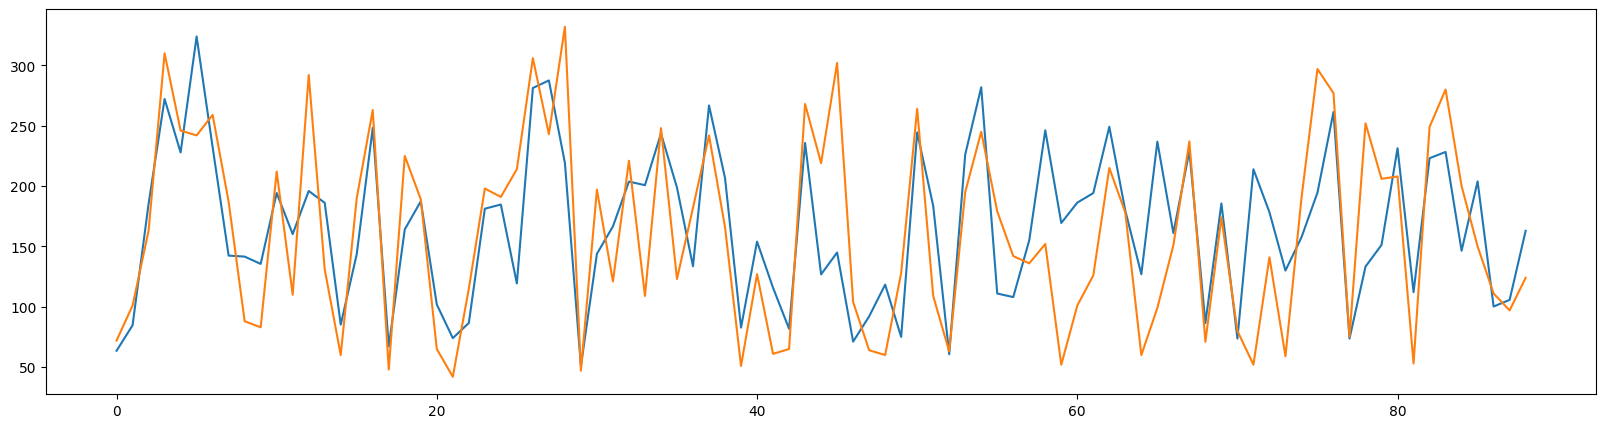

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(y_test)), gs.best_estimator_.predict(x_test))
plt.plot(range(len(y_test)), y_test)

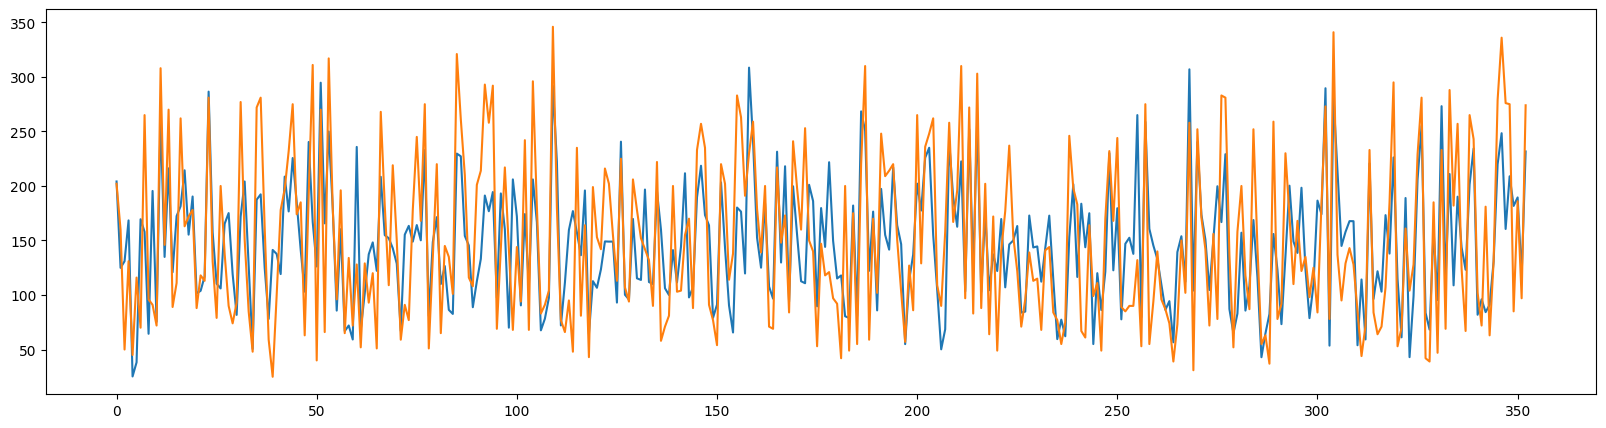

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(range(len(y_train)), gs.best_estimator_.predict(x_train))
plt.plot(range(len(y_train)), y_train)